## Visualize results

In [26]:
using Revise
using Distributions
using LinearAlgebra
using JLD2
using Plots;
using TuePlots; 
theme(:default;
    TuePlots.get_plotsjl_theme_kwargs(
        TuePlots.SETTINGS[:ProbNum25];
        fontsize = true,
        figsize = true,
    )...)


In [27]:
experiment_ids = 1:100

# Time parameters
Δt = 1.0
len_time = 100
tsteps = range(0, step=Δt, length=len_time)

# Preallocate result arrays
runtimes_MML = Vector(undef,length(experiment_ids))
runtimes_HMC = Vector(undef,length(experiment_ids))
runtimes_AR1 = Vector(undef,length(experiment_ids))
RMS_MML = Vector(undef,length(experiment_ids))
RMS_HMC = Vector(undef,length(experiment_ids))
RMS_AR1 = Vector(undef,length(experiment_ids))
NLE_MML = Vector(undef,length(experiment_ids))
NLE_HMC = Vector(undef,length(experiment_ids))
NLE_AR1 = Vector(undef,length(experiment_ids))
MML_MML = Vector(undef,length(experiment_ids))
MML_HMC = Vector(undef,length(experiment_ids))
MML_AR1 = Vector(undef,length(experiment_ids))

# Collect results
for (nn,id) in enumerate(experiment_ids)
    trialnum = lpad(id, 3, '0')

    res = load("results/experiment-roomocc-AR1-trialnum$trialnum.jld2")
    runtimes_MML[nn] = res["runtime_MML"]
    runtimes_HMC[nn] = res["runtime_HMC"]
    runtimes_AR1[nn] = res["runtime_AR1"]
    RMS_MML[nn], NLE_MML[nn], MML_MML[nn] = res["performance_MML"]
    RMS_HMC[nn], NLE_HMC[nn], MML_HMC[nn] = res["performance_HMC"]
    RMS_AR1[nn], NLE_AR1[nn], MML_AR1[nn] = res["performance_AR1"]
       
end

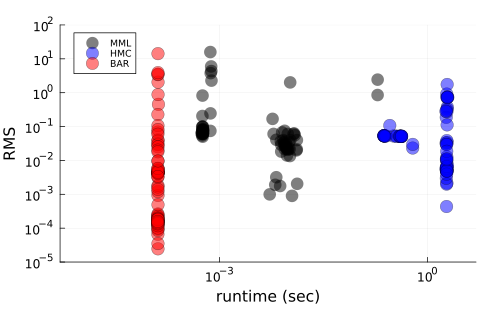

In [28]:
plot(xlabel="runtime (sec)", ylabel="RMS", xscale=:log10, yscale=:log10, legend=:topleft, margin=20Plots.pt)
scatter!(runtimes_MML,  RMS_MML, markersize=10, alpha=0.5, color="black", label="MML")
scatter!(runtimes_HMC, RMS_HMC, markersize=10, alpha=0.5, color="blue", label="HMC")
scatter!(runtimes_AR1, RMS_AR1, markersize=10, alpha=0.5,  color="red", label="BAR")
plot!(ylims=(1e-5,1e2), xlims=(5e-6, 5), guidefontsize=15, tickfontsize=12,)

In [ ]:
savefig("figures/experiment-roomocc-AR1-RMS.pdf")